In [2]:
#%pip install matplotlib numpy pandas
%pip install chardet


Note: you may need to restart the kernel to use updated packages.


Let's begin by importing the necessary packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Next, import the dataset.

In [4]:
myData = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
myData.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Great! Now let's clean the data. First let's take a quick look at the structure of the dataset:

In [5]:
myData.info()
myData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


__Some possible areas that need to be cleaned:__
- We can see that there are null values in columns "in_shazam_charts" and "key"<br>
- There's a song with release year "1930" which may be an outlier<br>
- The "streams", "in_deezer_playlists" and "in_shazam_charts" columns should be of number datatype so converting it into int64 type<br>
<br>


Dropping entries with null values:

In [6]:
myData.dropna(inplace=True)
myData.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [7]:
duplicates = myData[myData.duplicated(keep=False)]
num_duplicates = duplicates.shape[0]
print(f"Duplicate entries: {num_duplicates}")

Duplicate entries: 0


No duplicates, good. Now, the "streams", "in_deezer_playlists" and "in_shazam_charts" columns should be a number so converting it into integer type.<br>
While we're at it, let's also remove any non-numeric values on columns that are supposed to have numbers only.

In [8]:
myData = myData[~myData['streams'].str.contains(r'[^0-9]', regex = True, na = False)]
myData['streams'] = myData['streams'].astype('int64')
myData['in_deezer_playlists'] = myData['in_deezer_playlists'].str.replace(r'[^0-9]', '', regex = True).astype('int64')
myData['in_shazam_charts'] = myData['in_shazam_charts'].str.replace(r'[^0-9]', '', regex = True).astype('int64')


Let's take a look at the possible outlier data with 'release_year' as '1930'

In [9]:
tempdf = myData.sort_values(by='released_year')
columns_selected = ['track_name', 'artist(s)_name', 'released_year']
tempdf[columns_selected].head(10)


,track_name,artist(s)_name,released_year
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",1930
469,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",1942
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1946
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",1950
496,Jingle Bells - Remastered 1999,Frank Sinatra,1957
476,It's Beginning to Look a Lot Like Christmas (w...,"Perry Como, The Fontane Sisters, Mitchell Ayre...",1958
495,Run Rudolph Run - Single Version,Chuck Berry,1958
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1959
483,Deck The Hall - Remastered 1999,Nat King Cole,1959
471,Christmas (Baby Please Come Home),Darlene Love,1963


Legit songs with their corresponding year of release so not outliers and nothing to change here. 

Time to answer our questions with some visualizations

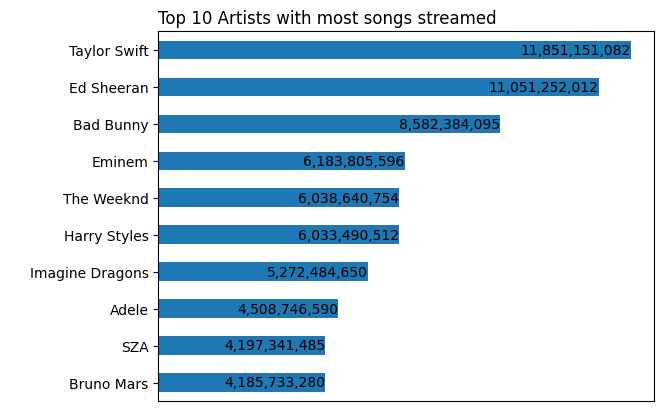

In [61]:
grouped_df = myData.groupby('artist(s)_name').sum().reset_index()                           #grouping artist names then add their total streams
grouped_df['streams_formatted'] = grouped_df['streams'].apply(lambda x: '{:,}'.format(x))   #make new column for stream count but add number format with commas for better readability
grouped_df = grouped_df.sort_values(by='streams', ascending=False).head(10)                 #sorting data by total stream, descending order
grouped_df = grouped_df.sort_values(by='streams')                                           #sort again, highest streams will be in bottom but they will be plotted at the top in the chart, because pandas
ax = grouped_df.plot(kind = 'barh', x = 'artist(s)_name', y = 'streams', legend = False)    #save the plot to variable for use later
                                                                                            
for index, (value, formatted_value) in enumerate(zip(grouped_df['streams'], grouped_df['streams_formatted'])):  #iterate through all values to make the stream count embedded into the bars
    text_position = value
    ax.text(text_position, index, formatted_value, color='black', va='center', ha='right')

ax.set_title('Top 10 Artists with most songs streamed', x = 0, ha = 'left') 
plt.ylabel(' ')
plt.xlabel('')
plt.xticks([])
plt.show()